In [ ]:
## Analysis Questions
#### 1.What are the items in the menu?
#### 2.How many Restaurants are around the USA?
#### 3.What are the Most Popular/Highly Rated Restaurants and menus?
#### 4.Is there any relationship between the price level and the popularity of a restaurant?
#### 5.Which menus are more expensive?
#### 6.Which zip codes contain the most rated restaurants?

In [25]:
#import pandas library to perform various data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [26]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
#importing kaggle library 
import kaggle

In [3]:
#download the dataset
!kaggle datasets download -d ahmedshahriarsakib/uber-eats-usa-restaurants-menus



  0%|          | 0.00/165M [00:00<?, ?B/s]
  1%|          | 1.00M/165M [00:00<00:28, 6.07MB/s]
  1%|1         | 2.00M/165M [00:00<00:22, 7.44MB/s]
  2%|1         | 3.00M/165M [00:00<00:21, 8.03MB/s]
  2%|2         | 4.00M/165M [00:00<00:20, 8.37MB/s]
  3%|3         | 5.00M/165M [00:00<00:19, 8.42MB/s]
  4%|3         | 6.00M/165M [00:00<00:19, 8.61MB/s]
  4%|4         | 7.00M/165M [00:00<00:19, 8.68MB/s]
  5%|4         | 8.00M/165M [00:01<00:18, 8.72MB/s]
  5%|5         | 9.00M/165M [00:01<00:18, 8.75MB/s]
  6%|6         | 10.0M/165M [00:01<00:18, 8.82MB/s]
  7%|6         | 11.0M/165M [00:01<00:18, 8.78MB/s]
  7%|7         | 12.0M/165M [00:01<00:18, 8.84MB/s]
  8%|7         | 13.0M/165M [00:01<00:18, 8.70MB/s]
  8%|8         | 14.0M/165M [00:01<00:18, 8.76MB/s]
  9%|9         | 15.0M/165M [00:01<00:18, 8.70MB/s]
 10%|9         | 16.0M/165M [00:01<00:18, 8.61MB/s]
 10%|#         | 17.0M/165M [00:02<00:17, 8.67MB/s]
 11%|#         | 18.0M/165M [00:02<00:18, 8.46MB/s]
 12%|#1        | 19.

In [4]:
#import library to unzip compressed file
import zipfile

In [5]:
#extract the file 
zipfile_name= "uber-eats-usa-restaurants-menus.zip"
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [22]:
#create the variables
restaurant_menus = pd.read_csv('restaurant-menus.csv')


In [23]:
restaurants = pd.read_csv('restaurants.csv')

In [27]:
restaurant_menus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4450099 entries, 0 to 4450098
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   restaurant_id  int64 
 1   category       object
 2   name           object
 3   description    object
 4   price          object
dtypes: int64(1), object(4)
memory usage: 169.8+ MB


In [28]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55227 entries, 0 to 55226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            55227 non-null  int64  
 1   position      55227 non-null  int64  
 2   name          55227 non-null  object 
 3   score         30845 non-null  float64
 4   ratings       30845 non-null  float64
 5   category      55173 non-null  object 
 6   price_range   45723 non-null  object 
 7   full_address  54831 non-null  object 
 8   zip_code      54798 non-null  object 
 9   lat           55227 non-null  float64
 10  lng           55227 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 4.6+ MB


## 1.What are the items in the menu?

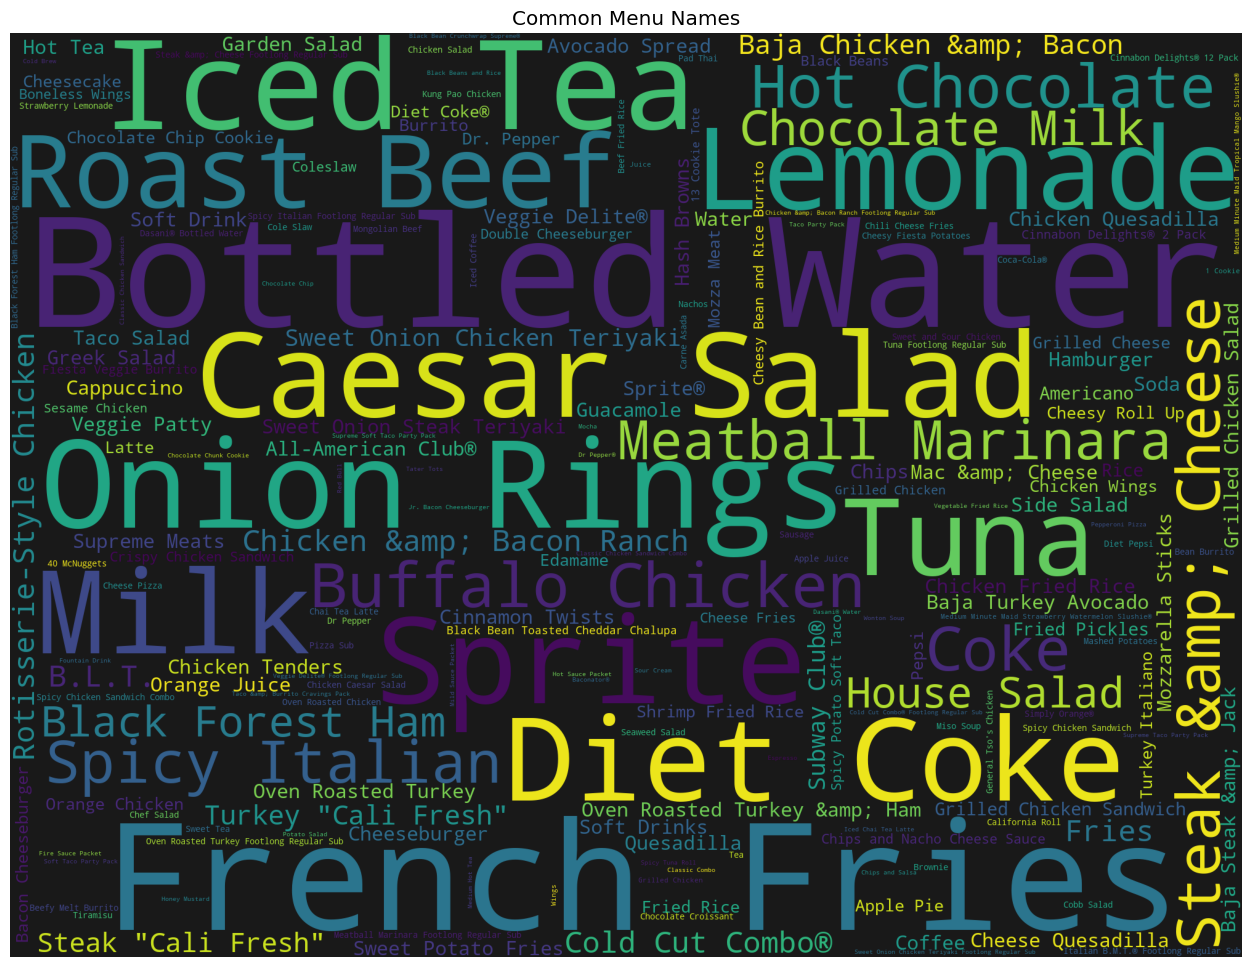

In [29]:
plt.figure(figsize=(16, 12))
names = restaurant_menus['name'].value_counts().to_dict()
words = WordCloud(width=2000, height= 1500, random_state= 1, background_color="#191919").generate_from_frequencies(names)
plt.imshow(words)
plt.title('Common Menu Names')
plt.axis('off')
plt.show()

## 2.How many Restaurants are around the USA?

In [31]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55227 entries, 0 to 55226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            55227 non-null  int64  
 1   position      55227 non-null  int64  
 2   name          55227 non-null  object 
 3   score         30845 non-null  float64
 4   ratings       30845 non-null  float64
 5   category      55173 non-null  object 
 6   price_range   45723 non-null  object 
 7   full_address  54831 non-null  object 
 8   zip_code      54798 non-null  object 
 9   lat           55227 non-null  float64
 10  lng           55227 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 4.6+ MB


In [34]:
restaurants['id'].nunique()

55227

## 3.What are the Most Popular/Highly Rated Restaurants and menus? 

In [35]:
restaurants.head(3)

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640


In [37]:
#check if the ratings dataframe has null values

restaurants['ratings'].isnull().sum()

24382

In [40]:
#replace the null values with empty strings
restaurants['ratings'].fillna('', inplace=True)

In [41]:
restaurants['ratings'].isnull().sum()

0

In [42]:
popular_restaurants = restaurants.sort_values(['score', 'ratings'], ascending= False)
popular_restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
18401,18402,68,Starbucks (S. Van Dorn and Pickett),5.0,223.0,"Cafe, Coffee &amp; Tea, Breakfast and Brunch, ...",$,"5782 Dow Ave, Alexandria, VA, 22304",22304,38.804558,-77.132929
28607,28608,169,Sundevich,5.0,176.0,"Salads, American, Vegetarian, Sandwich",NaN,"601 New Jersey Ave. NW, Washington, DC, 20001",20001,38.897830,-77.011590
23134,23135,35,Berries &amp; Bowls,5.0,156.0,"Juice and Smoothies, Healthy, Vegetarian",$,"120 Market St, Gaithersburg, MD, 20878",20878,39.122270,-77.234758
22901,22902,15,Starbucks (South Riding Blvd),5.0,137.0,"Cafe, Coffee &amp; Tea, Breakfast and Brunch, ...",$,"43114 Peacock Market #140, South Riding, VA, 2...",20152,38.915668,-77.511693
19926,19927,86,Open Road (ROSSLYN),5.0,136.0,"Burgers, American, Sandwiches",$,"1201 Wilson Boulevard, Arlington, VA, 22209",22209,38.895720,-77.071040


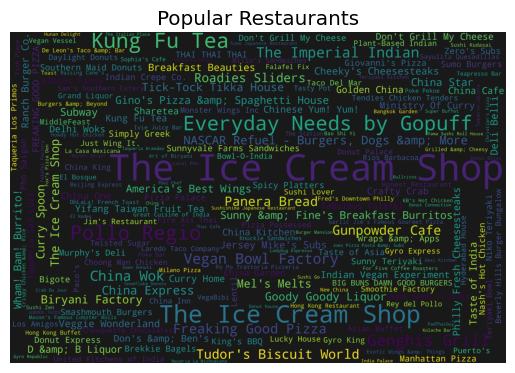

In [46]:
popular = popular_restaurants['name'].value_counts().to_dict()
names = WordCloud(width = 3000, height= 2000, random_state= 1, background_color="#191919").generate_from_frequencies(popular)
plt.imshow(names)
plt.title('Popular Restaurants')
plt.axis('off')
plt.show()

In [48]:
fig = px.scatter(popular_restaurants, x='score', y= 'ratings', size_max=45, log_x=True, template='plotly_dark')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()